In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

plt.rcParams['figure.figsize'] = (15, 5)

complaints = pd.read_csv('./data/311_small.csv')  # we'll use the small version here

C:\Users\HP\AppData\Local\Temp\ipykernel_8868\3957529669.py:9: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('./data/311_small.csv')  # we'll use the small version here


In [2]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


In [3]:
complaints.iloc[:, [8,31,32,34,35,36,37]].columns  # these are the columns with inconsistent dtypes

Index(['Incident Zip', 'Vehicle Type', 'Taxi Company Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment'],
      dtype='object')

In [4]:
complaints['Complaint Type'].value_counts()[:15]

Complaint Type
HEAT/HOT WATER                         124358
Noise - Residential                     83272
General Construction/Plumbing           57295
Illegal Parking                         56634
Request Large Bulky Item Collection     54515
Blocked Driveway                        51171
Street Condition                        47301
Water System                            28549
Street Light Condition                  26744
UNSANITARY CONDITION                    25171
Noise                                   22002
PAINT/PLASTER                           19879
PLUMBING                                19673
Noise - Commercial                      17555
Noise - Street/Sidewalk                 17337
Name: count, dtype: int64

In [5]:
complaints[['Complaint Type', 'Borough']].value_counts()[:15]

Complaint Type                       Borough  
HEAT/HOT WATER                       BRONX        40419
                                     BROOKLYN     38810
General Construction/Plumbing        BROOKLYN     32272
HEAT/HOT WATER                       MANHATTAN    27572
Noise - Residential                  BROOKLYN     23083
                                     BRONX        22935
Request Large Bulky Item Collection  QUEENS       22427
Illegal Parking                      BROOKLYN     21362
Noise - Residential                  MANHATTAN    20731
Blocked Driveway                     QUEENS       20473
Request Large Bulky Item Collection  BROOKLYN     20382
Blocked Driveway                     BROOKLYN     18805
Illegal Parking                      QUEENS       17886
HEAT/HOT WATER                       QUEENS       16362
Street Condition                     QUEENS       15239
Name: count, dtype: int64

In [6]:
all_counts = complaints['Complaint Type'].value_counts()

In [7]:
type(all_counts)

pandas.core.series.Series

<Axes: xlabel='Complaint Type'>

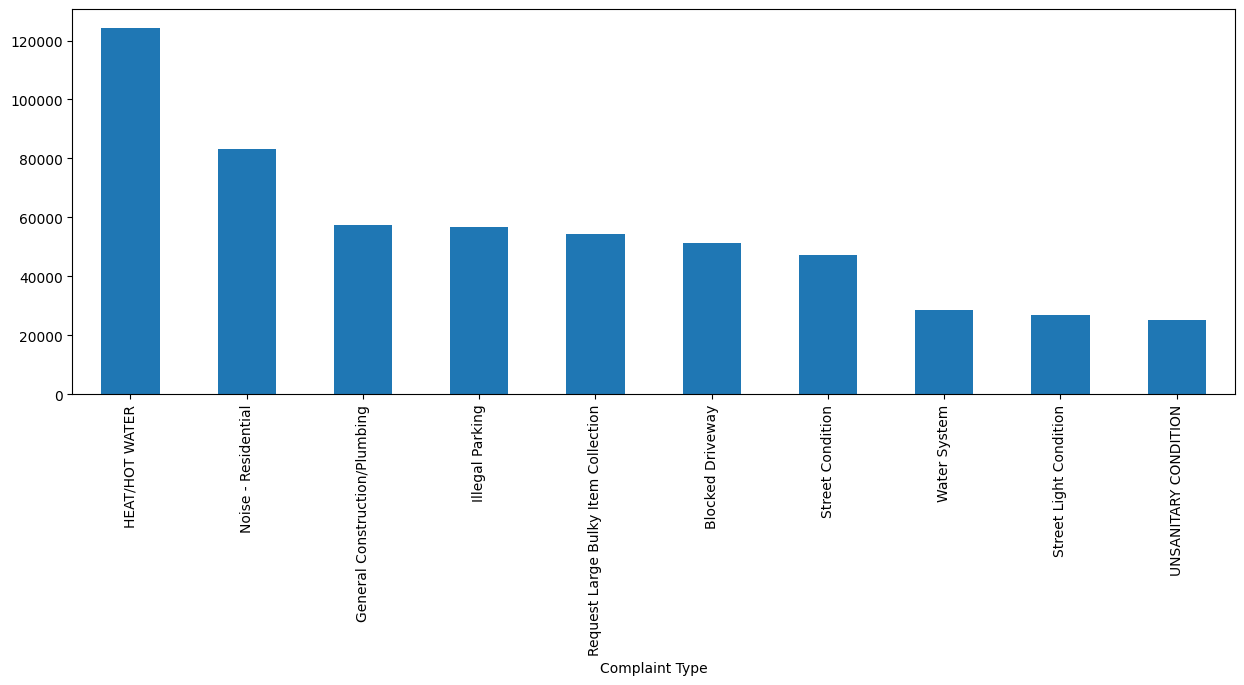

In [8]:
all_counts[:10].plot(kind="bar")

In [9]:
parking_complaints = complaints[complaints['Complaint Type']=='Illegal Parking']

In [10]:
parking_complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
parking_complaints.shape

(56634, 41)

In [12]:
borough_complaints = complaints['Borough'].value_counts()
borough_complaints

Borough
BROOKLYN         322885
QUEENS           240326
BRONX            182361
MANHATTAN        181866
STATEN ISLAND     53961
Unspecified       18502
Name: count, dtype: int64

In [16]:
borough_complaints.shape

(6,)

In [21]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,HEAT/HOT WATER,BROOKLYN
1,HPD Literature Request,Unspecified
2,Smoking,BROOKLYN
3,Sidewalk Condition,MANHATTAN
4,Damaged Tree,STATEN ISLAND
...,...,...
999994,Blocked Driveway,QUEENS
999995,Blocked Driveway,QUEENS
999996,Blocked Driveway,QUEENS
999997,Blocked Driveway,BRONX


In [13]:
boruogh_parking_complaints = parking_complaints['Borough'].value_counts()
boruogh_parking_complaints

Borough
BROOKLYN         21362
QUEENS           17886
MANHATTAN         7246
BRONX             7027
STATEN ISLAND     3068
Unspecified         45
Name: count, dtype: int64

<Axes: xlabel='Borough'>

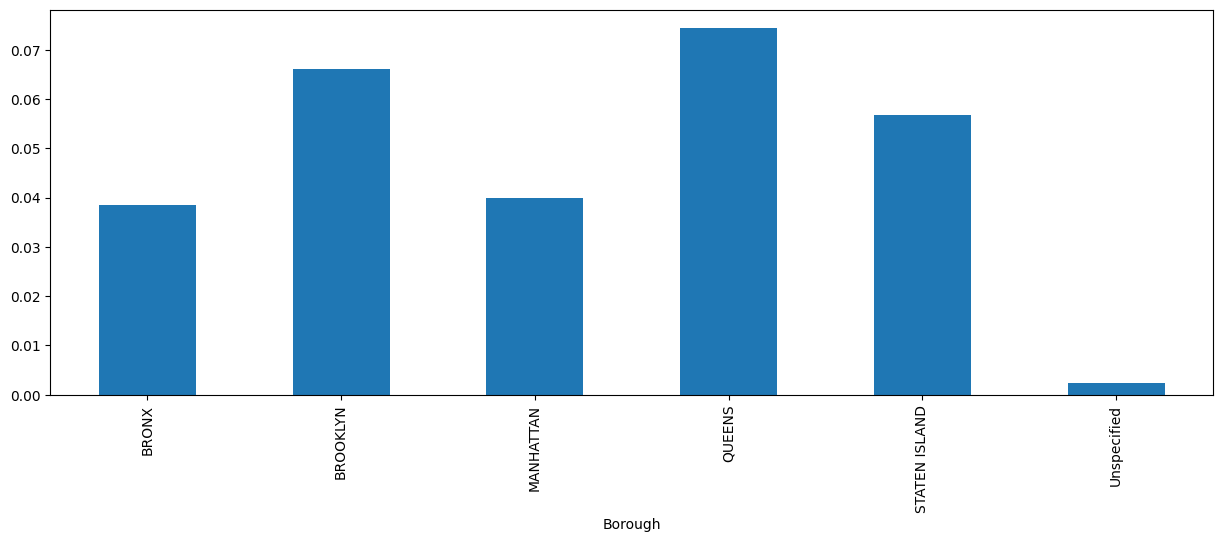

In [14]:
(boruogh_parking_complaints / borough_complaints).plot(kind="bar")

In [28]:
complaints.groupby("Borough")['Complaint Type']

In [23]:
most_frequent = complaints.groupby("Borough")["Complaint Type"].agg(lambda x: x.value_counts().index[0])
most_frequent

Borough
BRONX                                 HEAT/HOT WATER
BROOKLYN                              HEAT/HOT WATER
MANHATTAN                             HEAT/HOT WATER
QUEENS           Request Large Bulky Item Collection
STATEN ISLAND                       Street Condition
Unspecified              DOF Parking - Payment Issue
Name: Complaint Type, dtype: object

In [29]:
complaint_pct = complaints.groupby("Borough")["Complaint Type"].value_counts(normalize=True) * 100
print(complaint_pct)

Borough      Complaint Type               
BRONX        HEAT/HOT WATER                   22.164279
             Noise - Residential              12.576702
             Blocked Driveway                  4.953362
             General Construction/Plumbing     4.407741
             UNSANITARY CONDITION              4.263521
                                                ...    
Unspecified  Recycling Enforcement             0.005405
             Root/Sewer/Sidewalk Condition     0.005405
             Select Message Type...            0.005405
             Street Sign - Dangling            0.005405
             Vending                           0.005405
Name: proportion, Length: 1063, dtype: float64


In [31]:
analysis = complaints.groupby(["Borough", "Complaint Type"]).size().reset_index(name='Count')
analysis['Percentage'] = analysis.groupby('Borough')['Count'].transform(lambda x: (x / x.sum()) * 100)

print(analysis.sort_values(['Borough', 'Percentage'], ascending=[True, False]))

          Borough                 Complaint Type  Count  Percentage
72          BRONX                 HEAT/HOT WATER  40419   22.164279
111         BRONX            Noise - Residential  22935   12.576702
16          BRONX               Blocked Driveway   9033    4.953362
70          BRONX  General Construction/Plumbing   8038    4.407741
167         BRONX           UNSANITARY CONDITION   7775    4.263521
...           ...                            ...    ...         ...
1035  Unspecified          Recycling Enforcement      1    0.005405
1038  Unspecified  Root/Sewer/Sidewalk Condition      1    0.005405
1042  Unspecified         Select Message Type...      1    0.005405
1050  Unspecified         Street Sign - Dangling      1    0.005405
1060  Unspecified                        Vending      1    0.005405

[1063 rows x 4 columns]


In [37]:
complaints['Incident Address'].values

array(['2709 CLARENDON ROAD', nan, '201 SOUTH 4 STREET', ...,
       '37-56 85 STREET', '583 VAN NEST AVENUE', '7323 STEWART AVENUE'],
      dtype=object)

In [32]:
complaints['Incident Address'].value_counts()

Incident Address
89-21 ELMHURST AVENUE            1484
1025 BOYNTON AVENUE               946
1425 DR M L KING JR BOULEVARD     846
9511 SHORE ROAD                   822
2090 EAST TREMONT AVENUE          790
                                 ... 
1250 JEFFERSON AVENUE               1
232 NOSTRAND AVENUE                 1
1682 86 STREET                      1
343 MENAHAN STREET                  1
60-48 67 AVENUE                     1
Name: count, Length: 301977, dtype: int64

In [39]:
karen = complaints[complaints['Incident Address']=="89-21 ELMHURST AVENUE"]
karen

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
229,38039441,12/28/2017 07:20:55 AM,01/03/2018 10:55:41 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
748,38039977,12/28/2017 07:03:23 AM,01/03/2018 10:55:41 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
892,38040122,12/28/2017 07:20:59 AM,01/03/2018 10:55:41 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
1523,38040910,12/28/2017 09:20:48 AM,01/03/2018 10:55:41 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
1539,38040931,12/28/2017 07:21:59 AM,01/03/2018 10:55:41 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994163,39233815,05/19/2018 07:12:19 AM,05/23/2018 02:12:35 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
994166,39233818,05/19/2018 07:13:54 AM,05/23/2018 02:12:35 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
994521,39234219,05/19/2018 07:12:21 AM,05/23/2018 02:12:35 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"
995171,39234961,05/19/2018 07:14:16 AM,05/23/2018 02:12:35 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,89-21 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74742,-73.876853,"(40.747420328856705, -73.87685300997468)"


In [45]:
karen1 = karen['Complaint Type'].value_counts()
karen1

Complaint Type
HEAT/HOT WATER                   1413
Noise - Residential                21
Noise - Street/Sidewalk            19
Illegal Parking                    11
Noise - Vehicle                     3
PLUMBING                            3
UNSANITARY CONDITION                3
WATER LEAK                          2
Rodent                              2
DOOR/WINDOW                         2
Drug Activity                       2
General Construction/Plumbing       1
Snow                                1
Drinking                            1
Name: count, dtype: int64

<Axes: xlabel='Complaint Type'>

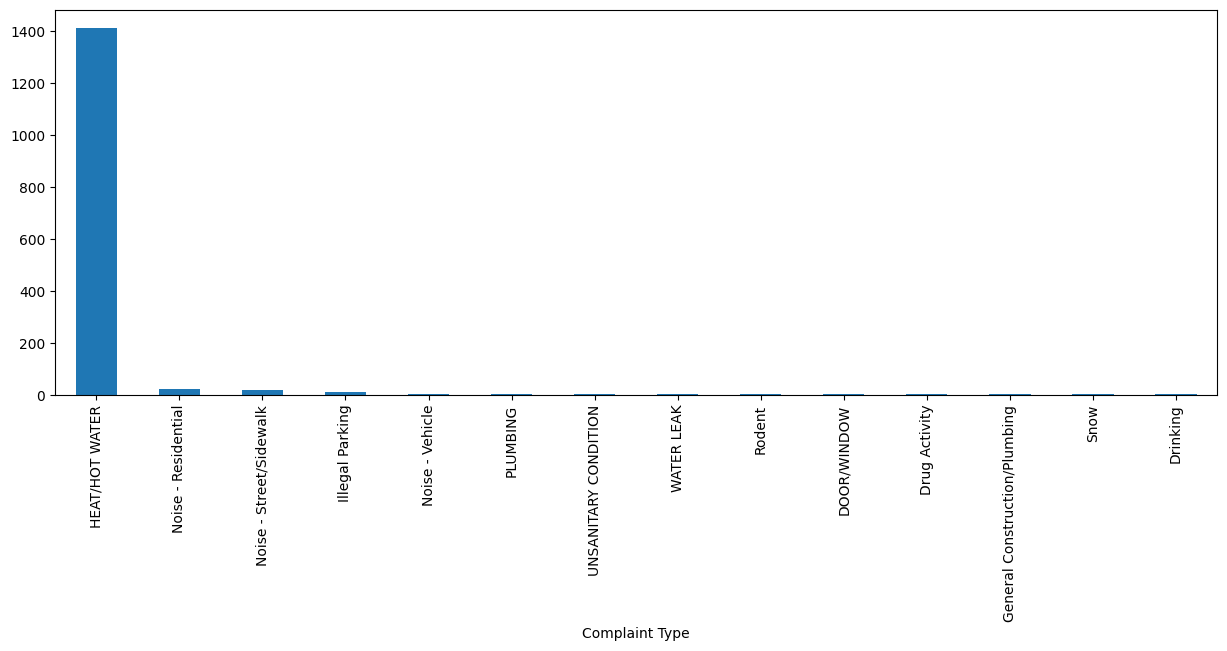

In [46]:
karen1.plot(kind='bar')

In [49]:
zips = complaints['Incident Zip']
zips.head()

0    11226
1      NaN
2    11211
3    10032
4    10303
Name: Incident Zip, dtype: object

In [47]:
zips.shape

(999999,)

### How many missing values?

In [48]:
zips.isna().sum()

np.int64(88509)

In [50]:
zips.dropna()

0           11226
2           11211
3           10032
4           10303
5           10466
           ...   
999994    11358.0
999995    11420.0
999996    11372.0
999997    10460.0
999998    11209.0
Name: Incident Zip, Length: 911490, dtype: object

In [52]:
zips.dropna().isna().sum()

np.int64(0)

In [ ]:
import numpy as np
def clean_zipcode(x): 
    try: 
        res= int(x)
    except (ValueError, TypeError): 
        if pd.isna(x): 
            res = -1 # missing value 
        else:
            try:  
                res = int(x.split("-")[0])
            except:
                res = 0
    return res  


In [54]:
clean_zipcode("36701-1234")

36701

### Clean Float and String

In [55]:
def float_and_string(x):
    try:
        return float(x)
    except:
        return str(x)

In [56]:
zip1 = zips.apply(lambda x: float_and_string(x))

In [57]:
zip1.apply(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [60]:
zip1[zip1.apply(lambda x: isinstance(x, str))]

883       37214-0065
40092         NEWARK
40145     10423-0935
63485     90054-0807
64033     18773-9640
76409     08690-1717
90617     11797-9004
146452    44087-2340
154503           UNK
159120             ?
164769    91716-0500
166800       NO IDEA
179235    30353-0942
179493             ?
209339       UNKNOWN
244742    30092-2670
253124             *
329115             *
379814       UNKNOWN
392099    53566-8019
419089    12551-0831
505758    17108-0988
508559    17108-0988
511704       UNKNOWN
549824    85251-3643
606653    11590-5027
654119    11735-3946
682171    11802-9060
685967             *
688809    61702-3517
760548    55164-0437
924175    61702-3517
957902       UNKNOWN
983209    14225-1032
Name: Incident Zip, dtype: object

In [61]:
zip1[zip1.apply(lambda x: isinstance(x, str))].value_counts()

Incident Zip
UNKNOWN       4
*             3
17108-0988    2
61702-3517    2
?             2
90054-0807    1
NEWARK        1
10423-0935    1
18773-9640    1
37214-0065    1
UNK           1
44087-2340    1
11797-9004    1
08690-1717    1
30353-0942    1
30092-2670    1
NO IDEA       1
91716-0500    1
12551-0831    1
53566-8019    1
11590-5027    1
85251-3643    1
11735-3946    1
11802-9060    1
55164-0437    1
14225-1032    1
Name: count, dtype: int64

### Regex

In [66]:
def clean_string(x):
    pt1 = re.compile(r'[a-zA-Z]+')  #any words
    pt2 = re.compile(r'[*]+')       #  *
    pt3 = re.compile(r'[?]+')       #  ?
    if isinstance(x, str):
        for pt in [pt1, pt2, pt3]:
            if re.search(pt,x):
                return np.nan
    return x
    
    

In [68]:
zip2 = zip1.apply(lambda x: clean_string(x))
zip2

0         11226.0
1             NaN
2         11211.0
3         10032.0
4         10303.0
           ...   
999994    11358.0
999995    11420.0
999996    11372.0
999997    10460.0
999998    11209.0
Name: Incident Zip, Length: 999999, dtype: object

In [69]:
zip2[zip2.apply(lambda x: isinstance(x, str))]

883       37214-0065
40145     10423-0935
63485     90054-0807
64033     18773-9640
76409     08690-1717
90617     11797-9004
146452    44087-2340
164769    91716-0500
179235    30353-0942
244742    30092-2670
392099    53566-8019
419089    12551-0831
505758    17108-0988
508559    17108-0988
549824    85251-3643
606653    11590-5027
654119    11735-3946
682171    11802-9060
688809    61702-3517
760548    55164-0437
924175    61702-3517
983209    14225-1032
Name: Incident Zip, dtype: object

In [71]:
zip2[zip2.apply(lambda x: isinstance(x, str))].value_counts()  #remaining string

Incident Zip
17108-0988    2
61702-3517    2
37214-0065    1
10423-0935    1
18773-9640    1
90054-0807    1
08690-1717    1
11797-9004    1
30353-0942    1
30092-2670    1
44087-2340    1
91716-0500    1
12551-0831    1
53566-8019    1
11590-5027    1
85251-3643    1
11735-3946    1
11802-9060    1
55164-0437    1
14225-1032    1
Name: count, dtype: int64

In [72]:
def split_on_dash(x):
    pat = re.compile(r'\d{5}')   #5 digit
    p = re.compile(r'-')         #- charavter
    try:
        if re.search(p, x) and re.match(pat, x):
            return float(x.split('-')[0])
    except:
        return x
        
    

In [73]:
zip3 = zip2.apply(lambda x: split_on_dash(x))

In [74]:
zip3.apply(type).unique()

array([<class 'float'>], dtype=object)

In [75]:
zip3[zip3.apply(lambda x: isinstance(x, str))]

Series([], Name: Incident Zip, dtype: float64)

## checking valid zip code

##All these are outside NYC.

If you look [here](https://bklyndesigns.com/new-york-city-zip-code/) you'll find that valid NYC zip codes are:
  * Manhattan: 10001-10282
  * Staten Island: 10301-10314
  * Bronx: 10451-10475
  * Queens: 11004-11109, 11351-11697
  * Brooklyn: 11201-11256

In [90]:
def clean_valid_zip_codes(x):
    try:
        code = int(x)
    except:
        return np.nan
    if code < 10001 or code > 11697:
        return np.nan
    elif 10282 < code < 10301:
        return np.nan
    elif 10314 < code < 10451:
        return np.nan
    elif 10475 < code < 11004:
        return np.nan
    elif 11109 < code < 11201:
        return np.nan
    elif 11256 < code < 11351:
        return np.nan
    else:
        return code
    

In [91]:
zip4 = zip3.apply(lambda x: clean_valid_zip_codes(x))

In [94]:
complaints['Incident Zip'].shape == zip4.shape

True

In [95]:
zip4.isna().sum() < complaints['Incident Zip'].isna().sum()

np.False_

In [96]:
complaints['Incident Zip'] = zip4

In [98]:
complaints.to_csv('311_calls_small_almost_clean.csv', index=False)

In [99]:
top_10_zips = complaints['Incident Zip'].value_counts().head(10)
print(top_10_zips)

Incident Zip
11226.0    16365
11385.0    14102
10467.0    13672
10452.0    11651
10453.0    11539
10458.0    11476
11207.0    11175
11209.0    10826
10468.0    10664
10457.0    10601
Name: count, dtype: int64


In [100]:
complaints.iloc[top_10_zips, 16]

16365        BROOKLYN
14102        NEW YORK
13672           BRONX
11651        BROOKLYN
11539        BROOKLYN
11476           BRONX
11175        BROOKLYN
10826        BROOKLYN
10664        Woodside
10601    Saint Albans
Name: City, dtype: object

<Axes: xlabel='Incident Zip'>

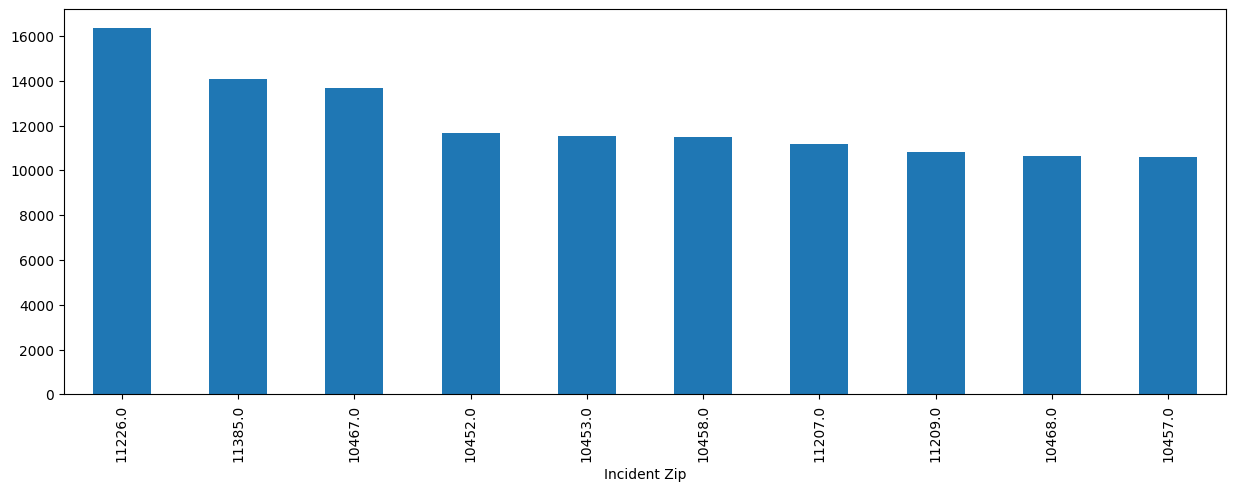

In [101]:
top_10_zips.plot(kind='bar')

In [102]:
top_zip = top_10_zips.index[0]
top_zip_complaints = complaints[complaints['Incident Zip'] == top_zip]
print(top_zip_complaints['Complaint Type'].value_counts().head(5))

Complaint Type
HEAT/HOT WATER          4115
Noise - Residential     1682
UNSANITARY CONDITION    1034
PAINT/PLASTER            902
PLUMBING                 801
Name: count, dtype: int64
